In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import  RandomizedSearchCV
from sklearn import tree

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
X = data.drop(['Id' , 'Species'] , axis = 1)
y = data['Species']

In [20]:
criterion = ['gini' , 'entropy']
max_depth = [4,6,8,10]
parameters = dict(max_depth = max_depth , criterion = criterion)

In [23]:
dtc = DecisionTreeClassifier()
clf = RandomizedSearchCV(dtc, parameters, cv=5 , n_iter = 20)
clf.fit(X,y)
print('score : ' , clf.best_score_)
print('params : ' , clf.best_params_)
print('best : ' , clf.best_estimator_)

score :  0.9666666666666668
params :  {'max_depth': 4, 'criterion': 'gini'}
best :  DecisionTreeClassifier(max_depth=4)


In [30]:
dtc = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')
clf = dtc.fit(X,y)

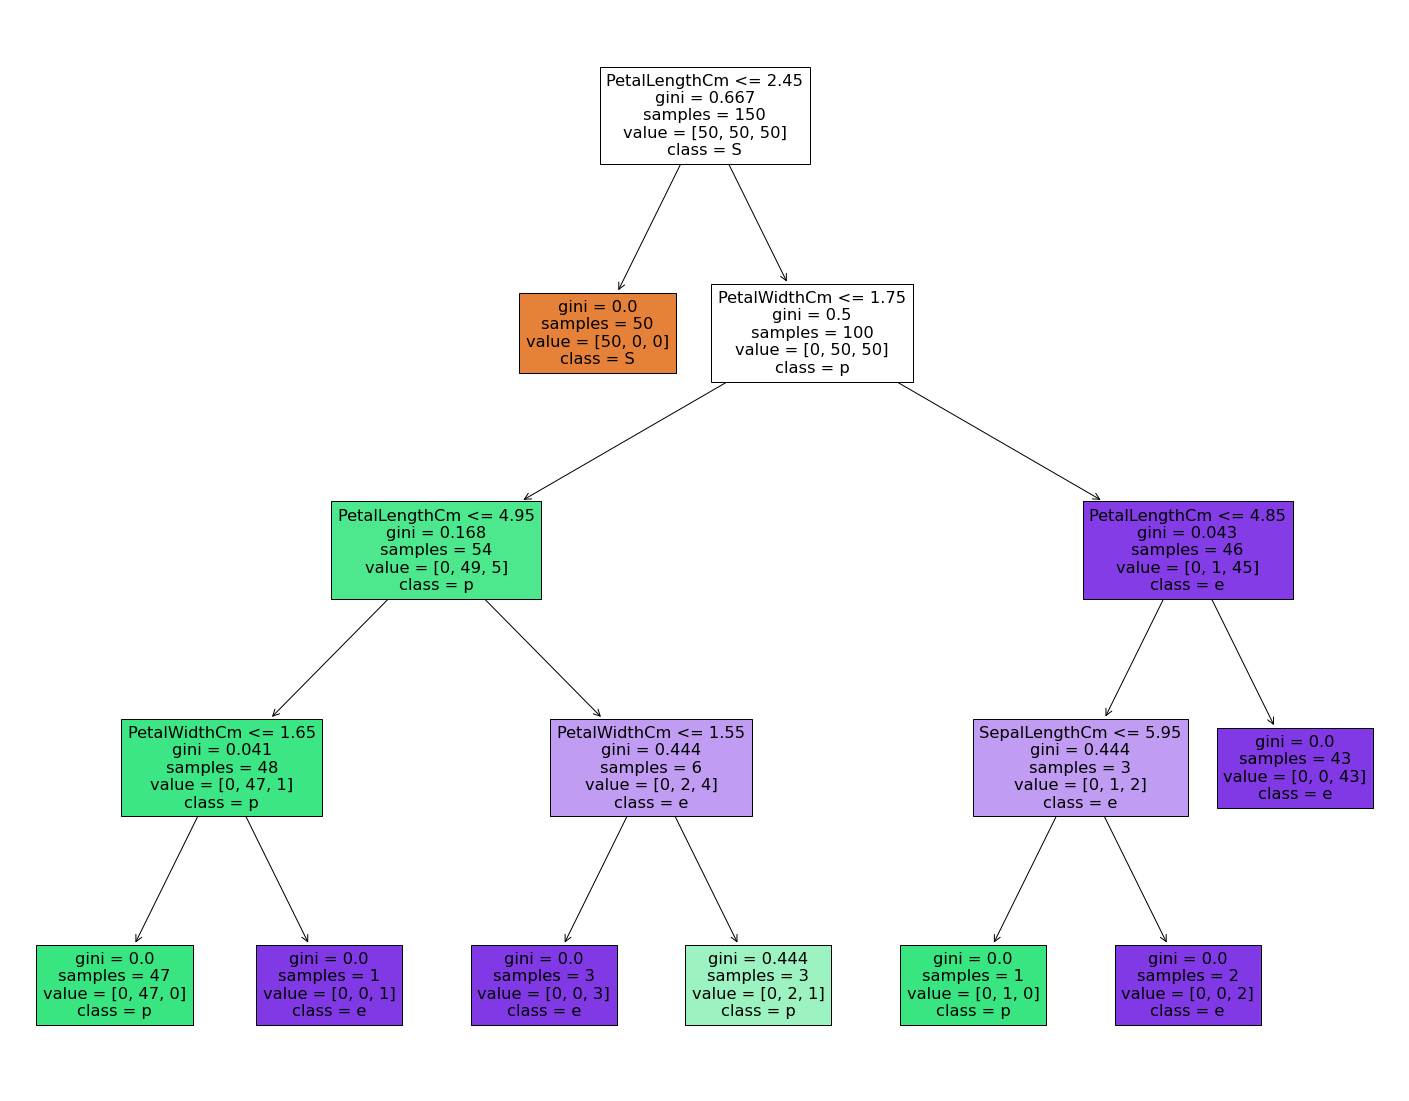

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names='Species',
                   filled=True)

In [32]:
clf.score(X,y)

0.9933333333333333